<a href="https://colab.research.google.com/github/yukomath/Project_1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 : Business Understanding

## Brief Description
This project uses data from the **Stack Overflow Developer Survey 2025** to analyze and predict software developers’ salaries based on their country,  education level, experience, and technical skills. The goal is to provide insights that help **job seekers understand their market value** and **make informed career decisions**.

---

## Business Objective
- To identify the key factors that influence developer salaries globally.  
- To build predictive models that estimate expected salaries based on individual profiles.  
- To help job seekers make data-driven decisions about compensation and skill development.

---

## Current Situation
- The global tech job market is highly competitive, and compensation varies widely depending on country, education level, experience, and skill set.  
- Stack Overflow’s annual developer survey provides a rich dataset capturing these variations.  
- By analyzing this data, we can identify **which skills, experiences, education level or locations command higher salaries.**

---

## Analytic Goals
1. Explore relationships between experience, education level, technical skills, and salary.  
2. Build regression models (Linear Regression, Random Forest, LightGBM) to predict developer salaries.  
3. Use SHAP analysis to interpret model outputs and identify the most influential factors.  
4. Allow users to input their own profiles and compare expected salaries across countries.




---

## Key Questions

### Question 1
**What salary can job seekers expect based on their experience?**  
→ Helps job seekers understand their market value and career progression potential.

### Question 2
**How do different programming languages or technologies impact salary expectations?**  
→ Guides job seekers on which skills are most valuable to develop.

### Question 3
**What is the average salary for job seekers in different countries or regions?**  
→ Supports relocation or remote work decisions based on geographic pay differences.

### Question 4
**How does education level affect salary potential for job seekers?**  
→ Helps evaluate the value of further education or certifications.




# Section 2: Data Understanding

## 2.1 Data Source

The dataset used in this project is [the Stack Overflow Developer Survey 2025](https://survey.stackoverflow.co/), which collects responses from software developers worldwide. This dataset provides a comprehensive view of global developer demographics, skills, and compensation.

## 2.2 Data Loading and Initial Exploration



### Preparation for Google Colab (Only Once)

Mounts Google Drive at /content/drive for file access in Colab.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The data was loaded from Google Drive in CSV format:


In [5]:
# import library
import pandas as pd
import numpy as np

# loading csv file from my google drive
path = '/content/drive/MyDrive/ColabProjects/StackOverflow2025/survey_results_public_2025.csv'
df = pd.read_csv(path, encoding='utf-8-sig')

# Check Data
print("Data loaded successfully")
print("Rows, Columns:", df.shape)



Data loaded successfully
Rows, Columns: (49123, 170)


## 2.3 Selected Variables for Analysis

We only focus on the following variables because they reflect the key factors that influence developer compensation:

- Country

- Education level (EdLevel)

- Years of coding experience (YearsCode)

- Employment type

- Programming languages used

- AI tools usage

- Target variable: Annual salary (ConvertedCompYearly)

These variables capture developers’ background, experience, and technical skills — all of which are essential for understanding global salary patterns and building accurate prediction models.

In [6]:
# Select relevant columns in the data

cols = [
    "Country",
    "EdLevel",
    "WorkExp",                # professional work experience years
    "YearsCode",              # coding experience years
    "LanguageHaveWorkedWith", # languages used
    "AISelect",               # AI tools usage indicator
    "ConvertedCompYearly"     # salary (target)
]
df = df[cols].copy()

In [7]:
# Preview a few rows
df.head()

,Country,EdLevel,WorkExp,YearsCode,LanguageHaveWorkedWith,AISelect,ConvertedCompYearly
0,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,14.0,Bash/Shell (all shells);Dart;SQL,"Yes, I use AI tools monthly or infrequently",61256.0
1,Netherlands,"Associate degree (A.A., A.S., etc.)",2.0,10.0,Java,"Yes, I use AI tools weekly",104413.0
2,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,12.0,Dart;HTML/CSS;JavaScript;TypeScript,"Yes, I use AI tools daily",53061.0
3,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,5.0,Java;Kotlin;SQL,"Yes, I use AI tools weekly",36197.0
4,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21.0,22.0,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,"Yes, I use AI tools weekly",60000.0


## 2.4 Data Structure and Variable Types

After selecting the relevant columns, the dataset contains a mix of numerical, categorical, and multi-label variables. Understanding the structure of each variable is essential for choosing appropriate preprocessing and modeling techniques.

### Variable Types Overview

| Variable | Description | Type | Notes |
|---------|-------------|------|-------|
| **Country** | Respondent’s country of residence | Categorical | High-cardinality categorical variable |
| **EdLevel** | Highest level of education achieved | Categorical | Contains multiple education formats and wording variations |
| **WorkExp** | Years of professional coding experience | Numerical (sometimes string) | Requires cleaning because some values are ranges or text (e.g., "Less than 1 year") |
| **YearsCode** | Years of coding experience (including non-professional) | Numerical (sometimes string) | Similar cleaning needed as WorkExp |
| **LanguageHaveWorkedWith** | Programming languages the respondent has worked with | Multi-label categorical | Contains languages in a semicolon-separated format |
| **AISelect** | Whether respondents use AI tools | Categorical / Binary | May contain multiple selections |
| **ConvertedCompYearly** | Annual salary in USD | Numerical | Target variable; contains outliers and missing values |

### Key Points

- Categorical variables require encoding before modeling.  
- Numeric variables require cleaning and conversion.  
- Multi-label variables (like programming languages) will be expanded using multi-hot encoding.  
- The target variable may contain extreme outliers that need attention during preprocessing.


In [8]:
# Check data types of all selected columns
print("=== Data Types ===")
display(df.dtypes.to_frame(name="DataType"))

print("\n=== DataFrame Info ===")
df.info()


=== Data Types ===


,DataType
Country,object
EdLevel,object
WorkExp,float64
YearsCode,float64
LanguageHaveWorkedWith,object
AISelect,object
ConvertedCompYearly,float64



=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 35402 non-null  object 
 1   EdLevel                 48087 non-null  object 
 2   WorkExp                 42844 non-null  float64
 3   YearsCode               43000 non-null  float64
 4   LanguageHaveWorkedWith  31643 non-null  object 
 5   AISelect                33686 non-null  object 
 6   ConvertedCompYearly     23928 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.6+ MB


### Summary

The dataset contains three types of variables:

| Type                        | Variables                               | Notes                                                       |
| --------------------------- | --------------------------------------- | ----------------------------------------------------------- |
| **Numerical**               | WorkExp, YearsCode, ConvertedCompYearly | Include strings like “Less than 1 year”, require conversion |
| **Categorical**             | Country, EdLevel, AISelect              | Need encoding later                                         |
| **Multi-label categorical** | LanguageHaveWorkedWith                  | Semicolon-separated values → multi-hot encoding needed      |


## 2.5 Data Quality Issues

This section identifies data quality problems that must be addressed before modeling.



### 1. Missing Values

Common missing fields:

EdLevel (education level), WorkExp, LanguageHaveWorkedWith,AISelect, ConvertedCompYearly (salary)

→ Missing values will be handled in Section 3 (Data Preparation) using:

-- Filling categorical N/A with “Unknown”

-- Filling YearsCode with median

-- Dropping rows with missing salary


### 2. Inconsistent Formats

Some numeric fields are not numeric:

“Less than 1 year”

“More than 50 years”

“3-5 years”

→ These require conversion to numeric during preprocessing.


### 3. Multi-label Values

LanguageHaveWorkedWith contains values like:

Python;JavaScript;SQL


→ Must be expanded into multi-hot encoded columns.

### 4. Outliers

Salary contains extreme values (e.g., 0, 1, 1,000,000+ USD).

→ We will filter data to a reasonable range (e.g., 5,000–500,000 USD).

## 2.6 Initial Finding

Here we perform basic exploratory analysis before data cleaning.

### 2.6.1. Number of Countries
The dataset includes developers from 177 unique countries, reflecting a wide geographic coverage.

In [9]:
print("Number of unique countries:", df["Country"].nunique())


Number of unique countries: 177


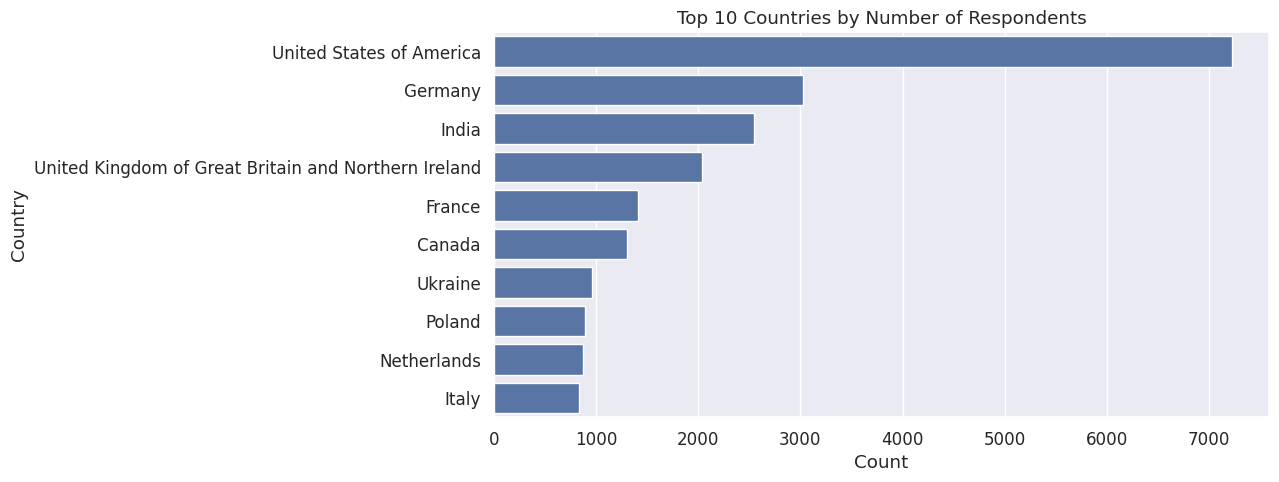

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set(font_scale=1.1)

# --------------------------------------
# Top 10 Countries
# --------------------------------------
country_counts = df["Country"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 Countries by Number of Respondents")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

### 2.6.2. Most Frequent Programming Languages

The most commonly used programming languages are dominated by Python, JavaScript, and SQL, indicating their widespread adoption among developers.

In [11]:
# Split multi-label languages
language_series = (
    df["LanguageHaveWorkedWith"]
    .dropna()
    .str.split(";", expand=True)
    .stack()
)

top_languages = language_series.value_counts().head(10)

print("Top 10 most used programming languages:")
display(top_languages)


Top 10 most used programming languages:


,count
JavaScript,20986
HTML/CSS,19681
SQL,18617
Python,18388
Bash/Shell (all shells),15486
TypeScript,13852
Java,9344
C#,8845
C++,7479
PowerShell,7366


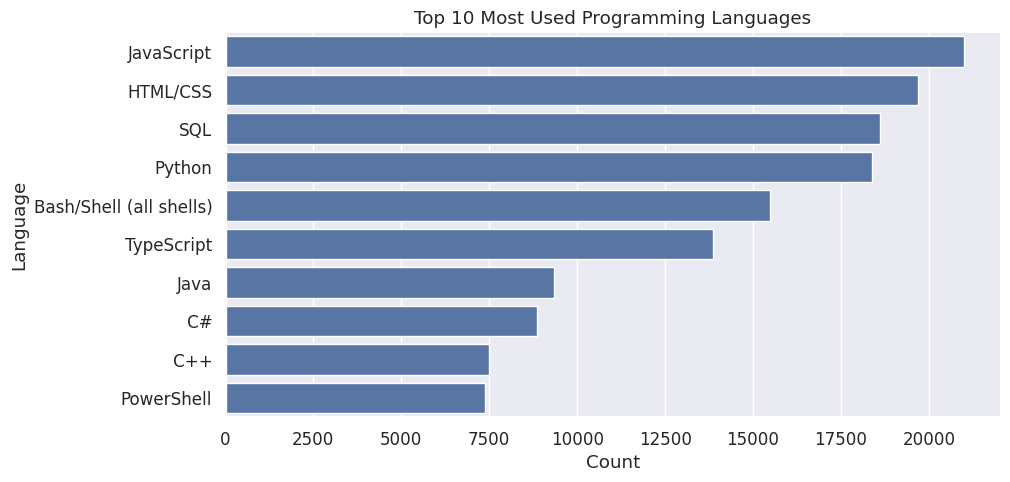

In [12]:
# --------------------------------------
# 2. Top 10 Programming Languages
# --------------------------------------
language_series = (
    df["LanguageHaveWorkedWith"]
    .dropna()
    .str.split(";", expand=True)
    .stack()
)

top_languages = language_series.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title("Top 10 Most Used Programming Languages")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()

### 2.6.3. Salary Basic Statistics

- The annual salary (ConvertedCompYearly) varies widely, ranging from very low to extremely high values (outliers above 1,000,000 USD).

- Most developers earn between 20,000 and 150,000 USD per year, with the distribution skewed to the right due to a small number of very high salaries.

- This long-tailed distribution suggests that while typical salaries are moderate, a few developers earn exceptionally high compensation.

- Visual inspection of the histogram (with outliers removed or log-transformed) shows a clear peak around the median salary and a gradual decline toward higher salaries.

In [13]:
print("Salary Statistics:")
display(df["ConvertedCompYearly"].describe())


Salary Statistics:


,ConvertedCompYearly
count,2.392800e+04
mean,1.017916e+05
std,4.619345e+05
min,1.000000e+00
25%,3.817100e+04
50%,7.538350e+04
75%,1.206302e+05
max,5.000000e+07


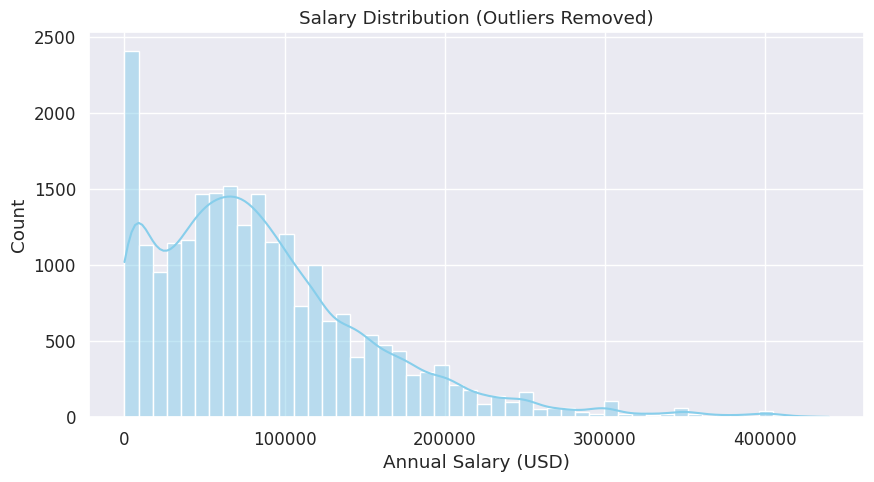

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data: salary column
salary = df["ConvertedCompYearly"]

# Remove outliers (top 1%)
salary_clean = salary[salary < salary.quantile(0.99)]

# Set plot style
plt.style.use('default')
sns.set(font_scale=1.1)

# --------------------------------------
# Histogram (normal scale)
# --------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(salary_clean, bins=50, kde=True, color='skyblue')
plt.title("Salary Distribution (Outliers Removed)")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Count")
plt.show()



### 2.6.4. Experience Distribution

YearsCode (total coding experience) also exhibits a wide range, with many developers clustered around 3–10 years of experience.

A smaller number of developers have very high experience (20+ years), which can influence salary predictions.

In [15]:
print("YearsCode (Raw) Statistics:")
display(df["YearsCode"].describe())


YearsCode (Raw) Statistics:


,YearsCode
count,43000.000000
mean,16.575256
std,11.789269
min,1.000000
25%,8.000000
50%,14.000000
75%,24.000000
max,100.000000


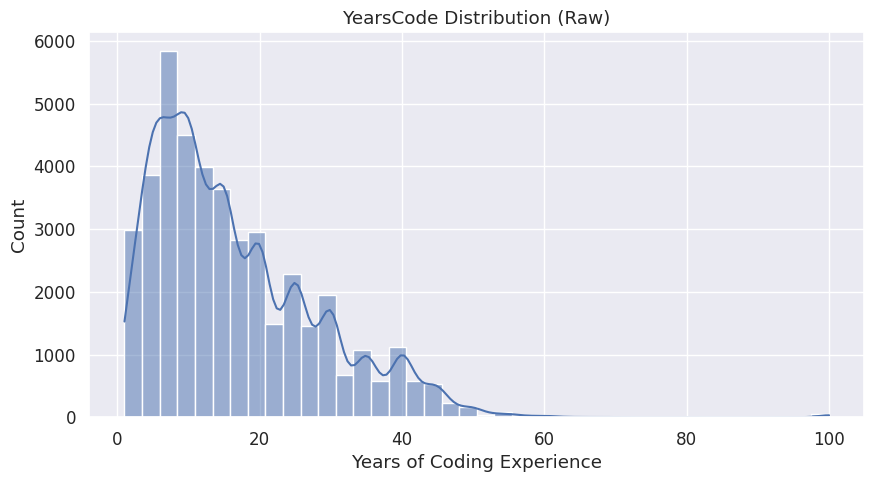

In [16]:
# --------------------------------------
# YearsCode Distribution
# --------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["YearsCode"], bins=40, kde=True)
plt.title("YearsCode Distribution (Raw)")
plt.xlabel("Years of Coding Experience")
plt.show()


# Section 3: Data Preparation


In this section, we clean and preprocess the dataset to make it ready for modeling.  
The main steps are:

1. **Handling Missing Values**  
   - Fill missing categorical values (`Country`, `EdLevel`, `AISelect`) with `"Unknown"`.  
   - Fill missing numerical values (`YearsCode`, `WorkExp`) with the median.  
   - Drop rows with missing target variable (`ConvertedCompYearly`).  

In [17]:
# --------------------------------------
# Step 1: Handling Missing Values
# --------------------------------------
categorical_cols = ["Country", "EdLevel", "AISelect"]
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

# Fill missing numerical values
median_yearscode = pd.to_numeric(df["YearsCode"], errors='coerce').median()
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce').fillna(median_yearscode)

# Convert WorkExp to numeric and fill remaining NaN
def convert_experience(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        value = value.strip().lower()
        if value == "less than 1 year":
            return 0.5
        elif value == "more than 50 years":
            return 50
        elif "-" in value:
            parts = value.split("-")
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except:
                return np.nan
        else:
            try:
                return float(value)
            except:
                return np.nan
    return value

df["WorkExp"] = df["WorkExp"].apply(convert_experience)
df["WorkExp"] = df["WorkExp"].fillna(df["WorkExp"].median())

# Drop rows with missing target
df = df.dropna(subset=["ConvertedCompYearly"])


2. **Multi-label Encoding**  
   - Convert `LanguageHaveWorkedWith` (semicolon-separated programming languages) into multi-hot encoded binary columns.

In [18]:
# --------------------------------------
# Step 2: Multi-label Encoding for Programming Languages
# --------------------------------------
languages_series = df["LanguageHaveWorkedWith"].dropna().str.split(";", expand=True).stack()
unique_languages = languages_series.unique()
multi_hot_df = pd.DataFrame(0, index=df.index, columns=unique_languages)

for i, langs in df["LanguageHaveWorkedWith"].dropna().items():
    for lang in langs.split(";"):
        multi_hot_df.at[i, lang] = 1

df = pd.concat([df, multi_hot_df], axis=1)
df.drop("LanguageHaveWorkedWith", axis=1, inplace=True)


3. **One-hot Encoding for Categorical Columns**  
   - Convert remaining categorical columns to numeric using one-hot encoding.  


In [19]:
#--------------------------------------
# Step 3: One-hot Encoding for Categorical Columns
# --------------------------------------
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


4. **Outlier Handling**  
   - Filter `ConvertedCompYearly` to a reasonable range (e.g. 5,000-500,000(USD)).  
  

In [20]:
# --------------------------------------
# Step 4: Outlier Handling
# --------------------------------------
min_salary = 5000
max_salary = 500000
df = df[(df["ConvertedCompYearly"] >= min_salary) &
        (df["ConvertedCompYearly"] <= max_salary)]


5. **Replace Special Characters in Column Names**  
   - LightGBM does not support special characters in column names, so replace them with underscores.


In [21]:
# --------------------------------------
# Step 5: Replace Special Characters in Column Names
# --------------------------------------
df.columns = df.columns.str.replace(r"[^A-Za-z0-9_]", "_", regex=True)


6. **Check the Cleaned Data**

In [22]:
# --------------------------------------
# Check the first few rows and datatypes
# --------------------------------------
print("Sample data after full preprocessing:")
display(df.head())
print("Data types after preprocessing:")
display(df.dtypes)

Sample data after full preprocessing:


,WorkExp,YearsCode,ConvertedCompYearly,Bash_Shell__all_shells_,Dart,SQL,Java,HTML_CSS,JavaScript,TypeScript,...,EdLevel_Primary_elementary_school,EdLevel_Professional_degree__JD__MD__Ph_D__Ed_D__etc__,EdLevel_Secondary_school__e_g__American_high_school__German_Realschule_or_Gymnasium__etc__,EdLevel_Some_college_university_study_without_earning_a_degree,EdLevel_Unknown,AISelect_No__but_I_plan_to_soon,AISelect_Unknown,AISelect_Yes__I_use_AI_tools_daily,AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,AISelect_Yes__I_use_AI_tools_weekly
0,8.0,14.0,61256.0,1,1,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,2.0,10.0,104413.0,0,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,10.0,12.0,53061.0,0,1,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
3,4.0,5.0,36197.0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,21.0,22.0,60000.0,0,0,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True


Data types after preprocessing:


,0
WorkExp,float64
YearsCode,float64
ConvertedCompYearly,float64
Bash_Shell__all_shells_,int64
Dart,int64
...,...
AISelect_No__but_I_plan_to_soon,bool
AISelect_Unknown,bool
AISelect_Yes__I_use_AI_tools_daily,bool
AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,bool


In [23]:
# Check data types of all columns
print("=== Data Types ===")
display(df.dtypes.to_frame(name="DataType"))


=== Data Types ===


,DataType
WorkExp,float64
YearsCode,float64
ConvertedCompYearly,float64
Bash_Shell__all_shells_,int64
Dart,int64
...,...
AISelect_No__but_I_plan_to_soon,bool
AISelect_Unknown,bool
AISelect_Yes__I_use_AI_tools_daily,bool
AISelect_Yes__I_use_AI_tools_monthly_or_infrequently,bool


# Section 4: Data Modeling

## 4.1. Train/Test Split

We split the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

- Features (X): Predictor variables -
"Country", "EdLevel", "WorkExp", "YearsCode", "LanguageHaveWorkedWith", "AISelect","ConvertedCompYearly"- influencing salary.

- Target (y): ConvertedCompYearly (annual salary).

- Random state: Ensures reproducible splits.

This prepares the data for modeling with Linear Regression, Random Forest, or LightGBM.

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import numpy as np

# --------------------------------------
# 1. Train/Test Split
# --------------------------------------

# Define features (X) and target (y)
X = df.drop("ConvertedCompYearly", axis=1)
y = df["ConvertedCompYearly"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2. Model Training: Linear Regression, Random Forest, LightGBM

Three regression models are trained:

- **Linear Regression**: A simple baseline model that assumes a linear relationship between features and salary.

- **Random Forest**: A powerful ensemble tree-based model that captures nonlinear patterns and interactions.

- **LightGBM**: A gradient boosting model known for high accuracy and efficiency, especially with high-dimensional data like ours (221 features).

Install required libraries for modeling and model interpretation.
LightGBM is used for gradient boosting regression and SHAP is used to interpret feature importance.

In [25]:
# Install dependencies (only once)
!pip install lightgbm shap -q
!pip install lightgbm -q

Train a Linear Regression model using the training dataset.

In [26]:
# ---- Linear Regression ----
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

Train a Random Forest model to capture non-linear relationships using multiple decision trees.


In [27]:
# ---- Random Forest ----
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Train a LightGBM model optimized for handling large feature sets efficiently.

In [28]:
# ---- LightGBM ----

lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 17636, number of used features: 120
[LightGBM] [Info] Start training from score 95267.523985


LGBMRegressor(learning_rate=0.05, n_estimators=1000, random_state=42)

## 4.3. Model Evaluation (R², MAE, RMSE)

Before evaluating model performance, we first generate predictions on the test dataset using each trained model. These predicted values will be compared with the actual salaries to compute accuracy metrics.

In [29]:
# --------------------------------------
# Predictions (must be done before evaluation)
# --------------------------------------

# Linear Regression prediction
lr_pred = lr_model.predict(X_test)

# Random Forest prediction
rf_pred = rf_model.predict(X_test)

# LightGBM prediction
lgb_pred = lgb_model.predict(X_test)

We evaluate each model using common regression metrics: R² to measure explanatory power, MAE to capture average error, and RMSE to assess the magnitude of large errors. These metrics help compare the overall performance of the models.

In [30]:
# ===== Linear Regression =====

lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred) ** 0.5

print("\n=== Linear Regression ===")
print("R²:", round(lr_r2, 4))
print("MAE:", round(lr_mae, 2))
print("RMSE:", round(lr_rmse, 2))


# ===== Random Forest =====


rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5

print("\n=== Random Forest ===")
print("R²:", round(rf_r2, 4))
print("MAE:", round(rf_mae, 2))
print("RMSE:", round(rf_rmse, 2))


# ===== LightGBM =====

lgb_r2 = r2_score(y_test, lgb_pred)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_rmse = mean_squared_error(y_test, lgb_pred) ** 0.5

print("\n=== LightGBM ===")
print("R²:", round(lgb_r2, 4))
print("MAE:", round(lgb_mae, 2))
print("RMSE:", round(lgb_rmse, 2))


=== Linear Regression ===
R²: 0.4406
MAE: 34280.06
RMSE: 51777.82

=== Random Forest ===
R²: 0.4267
MAE: 34641.39
RMSE: 52417.33

=== LightGBM ===
R²: 0.4738
MAE: 33236.76
RMSE: 50217.67


The results show that LightGBM delivers the best performance among the three models.
It achieves the highest R² (0.4738), meaning it explains the largest portion of variance in annual salary.
LightGBM also produces the lowest MAE and RMSE, indicating more accurate predictions and smaller average errors.

Linear Regression and Random Forest perform similarly, with Random Forest offering slightly lower error than Linear Regression but also having a lower R² score.
Overall, the boosting-based LightGBM model captures complex patterns in the data more effectively than the other techniques.

## 5. Feature Importance / SHAP

In this section, we analyze the importance of each feature in predicting developer salaries using SHAP (SHapley Additive exPlanations). Since LightGBM achieved the best performance among the three models, we focus the SHAP analysis exclusively on this model. SHAP provides an interpretable measure of how each variable contributes to individual predictions and overall model behavior. By visualizing SHAP values, we can identify which factors—such as experience, education, country, or programming languages—have the greatest impact on salaries.

In [31]:
import shap

# Create a TreeExplainer specifically for LightGBM
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)


Show Top 10 features by mean absolute SHAP.

In [32]:
import pandas as pd
import numpy as np

# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Create a DataFrame for easier sorting and display
shap_df = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanAbsSHAP": mean_abs_shap
})

# Sort by descending order and take top 10
top10_shap = shap_df.sort_values(by="MeanAbsSHAP", ascending=False).head(10)
print("Top 10 features by mean absolute SHAP value:")
display(top10_shap)


Top 10 features by mean absolute SHAP value:


,Feature,MeanAbsSHAP
199,Country_United_States_of_America,29072.739933
0,WorkExp,12459.999100
1,YearsCode,9059.018777
217,AISelect_Yes__I_use_AI_tools_daily,4038.958298
197,Country_United_Kingdom_of_Great_Britain_and_No...,3725.814019
29,PHP,3641.616918
6,HTML_CSS,3498.270720
32,Go,3398.132596
208,EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...,3276.090361
8,TypeScript,2952.520749


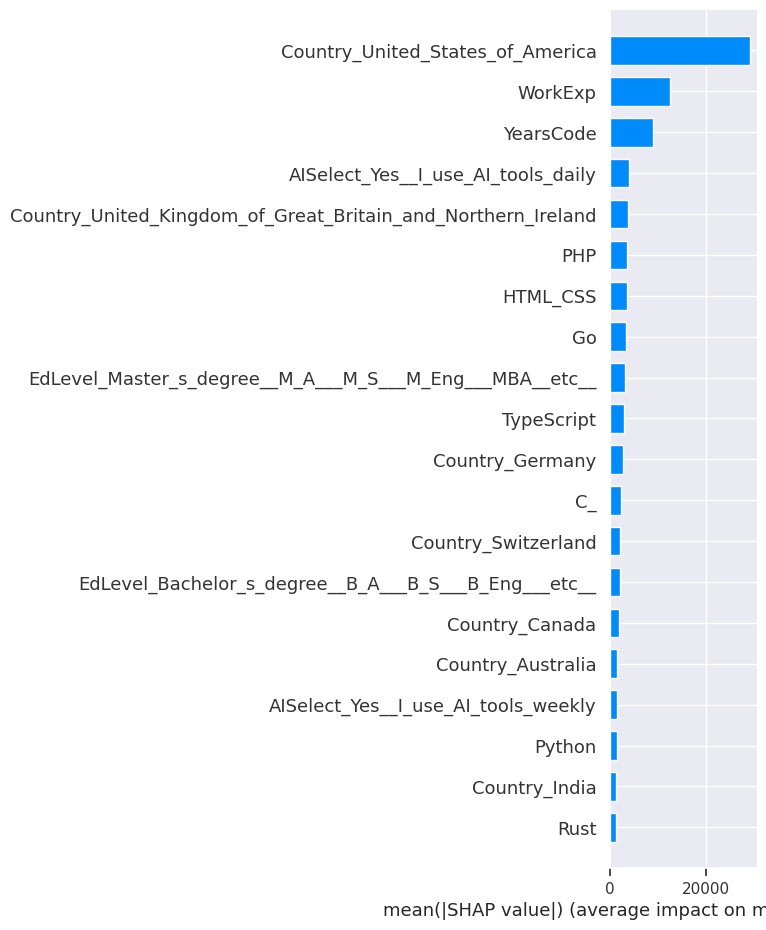

In [33]:
# Summary plot (bar chart)
shap.summary_plot(shap_values, X_test, plot_type="bar")



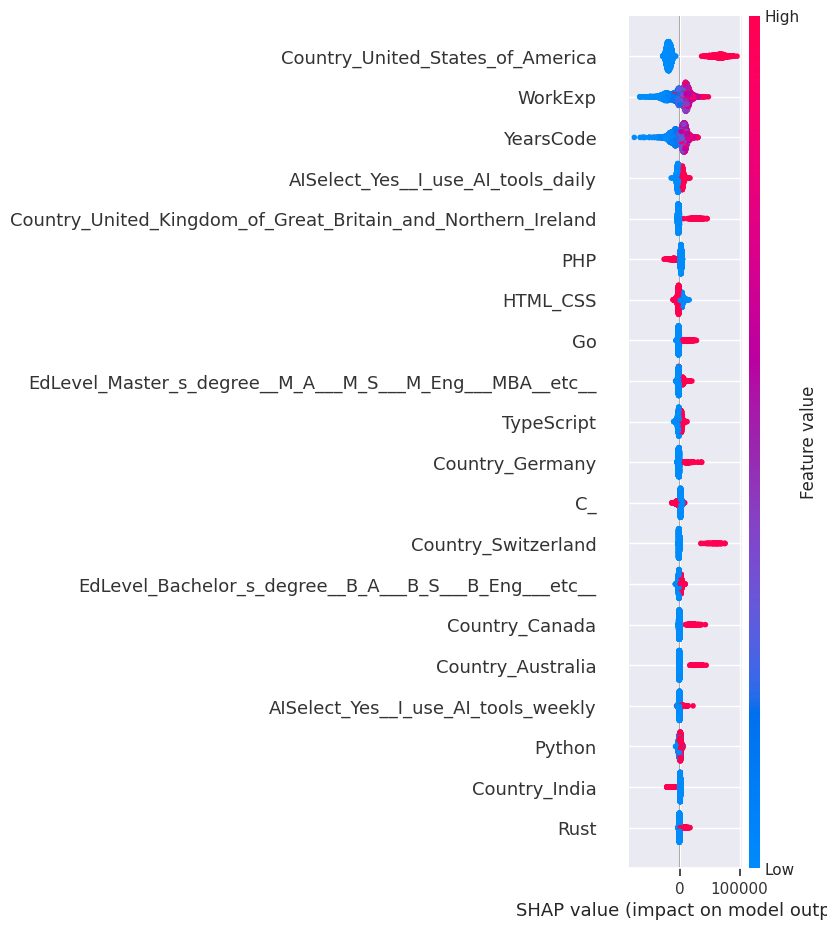

In [34]:
# Summary plot (detailed)
shap.summary_plot(shap_values, X_test)

# Optional: single prediction force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


## Interpretation of SHAP Analysis Results

The SHAP analysis highlights the features that have the greatest impact on developer salaries. The most influential factor is the country of residence. Being based in **the United States**, for example, has a significantly positive effect on salary compared to other factors. The next most important features are **years of professional experience **(WorkExp) and **years of coding experience** (YearsCode), indicating that more experienced developers can expect higher compensation.

Additionally, **using AI tools** on a daily basis contributes positively to salary, suggesting that proficiency with new technologies and tools can increase market value. Regarding programming languages, skills in **PHP, HTML/CSS, Go, and TypeScript** also have a measurable impact on salaries, meaning that mastering certain languages can enhance career and compensation prospects. Higher educational attainment, such as a master’s degree, also provides a positive effect.

From these results, job seekers can strategically increase their market value by focusing on a combination of location, experience, technical skills, and education. For instance, to target a higher salary, individuals may consider which languages or technologies to master, accumulate relevant experience, or even consider relocation to regions with higher pay levels.

# Section 5: Evaluate the Results

## Question 1: What salary can job seekers expect based on their experience?

Based on our models, years of professional experience (WorkExp) and total coding experience (YearsCode) are among the most influential factors in determining salary. The SHAP analysis for LightGBM shows that higher experience consistently increases predicted salaries.


## **Example: Salary Predictions by Years of Experience**

This example estimates annual compensation for a candidate with a master’s degree, Python skills, and weekly AI-tool usage in Germany.
The model shows how predicted salary evolves at 1, 5, 10, 15, and 20 years of experience.

In [100]:
import pandas as pd

# ---------------------------------------------
# Salary prediction for experience progression
# Country: Germany
# Education: Master's degree
# Languages: Python
# AI usage: Yes (weekly)
# Experience levels tested: 1, 5, 10, 15 years
# ---------------------------------------------

# Experience levels to test
experience_levels = [1, 5, 10, 15, 20]

results = []

for exp in experience_levels:
    # Create base row with all-zero columns
    row = {col: 0 for col in X_train.columns}

    # Set numeric features
    row["WorkExp"] = exp
    row["YearsCode"] = exp

    # Set categorical one-hot columns
    # Country
    country_col = "Country_Germany"
    if country_col in row:
        row[country_col] = 1

    # Education (Master's)
    edu_col = "EdLevel_Master_s_degree__M_A___M_S___M_Eng___MBA___etc__"
    if edu_col in row:
        row[edu_col] = 1

    # AI usage
    ai_col = "AISelect_Yes__I_use_AI_tools_weekly"
    if ai_col in row:
        row[ai_col] = 1

    # Programming language: Python
    if "Python" in row:
        row["Python"] = 1

    # Append row
    results.append(row)

# Convert to DataFrame
pred_df = pd.DataFrame(results)
pred_df = pred_df[X_train.columns]  # align columns

# Predict salaries
predicted_salaries = lgb_model.predict(pred_df)

# Create results table
output = pd.DataFrame({
    "ExperienceYears": experience_levels,
    "PredictedSalary": predicted_salaries
})

print("\n=== Salary Prediction for Experience Levels ===")
display(output)



=== Salary Prediction for Experience Levels ===


,ExperienceYears,PredictedSalary
0,1,15946.634110
1,5,60656.410805
2,10,76251.360044
3,15,98520.591373
4,20,103247.944622


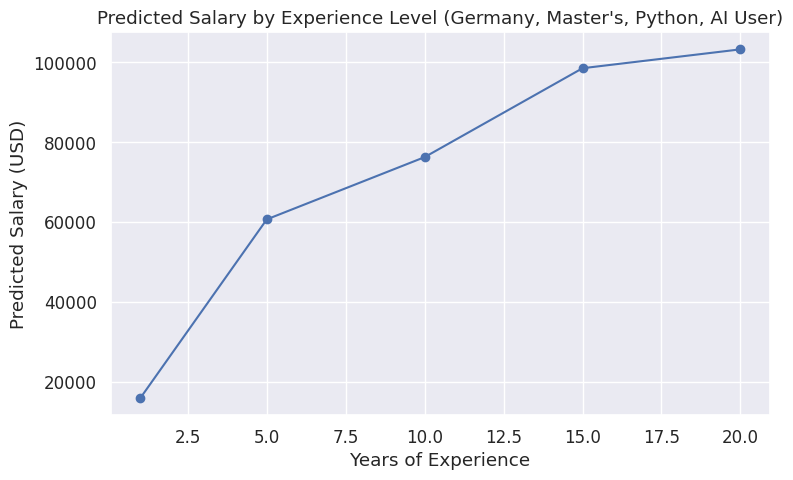

In [101]:
import matplotlib.pyplot as plt

# ----------------------------------------
# Plot: Experience vs Predicted Salary
# ----------------------------------------

plt.figure(figsize=(8, 5))

plt.plot(experience_levels, predicted_salaries, marker='o')

plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary (USD)")
plt.title("Predicted Salary by Experience Level (Germany, Master's, Python, AI User)")

plt.grid(True)
plt.tight_layout()
plt.show()


The results show that salary increases sharply between 1 and 5 years of experience, indicating that early-career growth is strong in Germany. Between 5 and 10 years, the growth continues but at a slower rate. After 10 years, the rate of increase slows further, suggesting diminishing returns as professionals reach senior levels. By 15 to 20 years, the salary curve begins to plateau, which aligns with typical compensation patterns in the German tech industry, where mid-career salaries see substantial growth but late-career increases are more moderate.

##Question 2: How do different programming languages or technologies impact salary expectations?

Our SHAP results reveal that specific programming languages influence salary differently.

- Languages like PHP, Go, TypeScript, and HTML/CSS show noticeable contributions to predicted salaries.

- Developers proficient in languages that are in high demand can expect a higher salary premium.
This analysis guides job seekers to focus on acquiring or strengthening skills in languages and technologies that have the highest market impact.

## **Example: Salary Predictions by Programming Language**

In this example, we estimate the expected annual salary for a candidate in the United States with a master’s degree, ten years of professional experience, ten years of coding experience, and weekly AI tool usage. We predict salaries for six programming languages—Python, JavaScript, PHP, Go, HTML/CSS, and TypeScript—assuming the candidate knows only one language at a time. This allows us to compare how different languages impact salary and provides insights into which skills may increase market value.

In [37]:
import pandas as pd

# List of programming languages to test
language_cols = ["Python", "JavaScript", "PHP", "Go", "HTML_CSS", "TypeScript"]

# Initialize results list
results = []

for lang in language_cols:
    # Create a row with all columns from training set, initialized to 0
    profile = pd.Series(0, index=X_train.columns)

    # Set numeric features
    profile["WorkExp"] = 10
    profile["YearsCode"] = 10

    # Set country
    if "Country_United_States_of_America" in profile.index:
        profile["Country_United_States_of_America"] = 1

    # Set education
    edu_col = "EdLevel_Master_s_degree__M_A___M_S___M_Eng___MBA___etc__"
    if edu_col in profile.index:
        profile[edu_col] = 1

    # Set AI usage
    ai_col = "AISelect_Yes__I_use_AI_tools_weekly"
    if ai_col in profile.index:
        profile[ai_col] = 1

    # Set current language
    if lang in profile.index:
        profile[lang] = 1

    # Convert to DataFrame
    profile_df = pd.DataFrame([profile])

    # Predict salary
    predicted_salary = lgb_model.predict(profile_df)[0]

    # Append result
    results.append({"Language": lang, "PredictedSalary": predicted_salary})

# Convert results to DataFrame
salary_by_language = pd.DataFrame(results)

salary_by_language


,Language,PredictedSalary
0,Python,141179.509748
1,JavaScript,138803.868995
2,PHP,109790.431800
3,Go,169571.379940
4,HTML_CSS,113130.175404
5,TypeScript,154442.166741


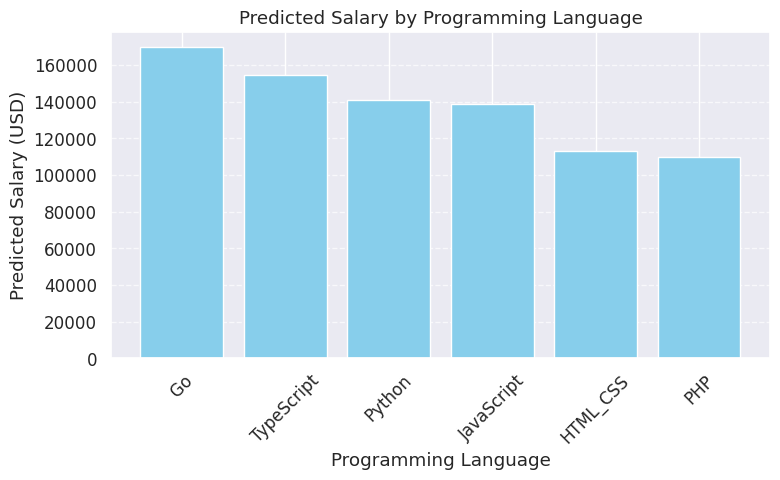

In [38]:
import matplotlib.pyplot as plt

# ----------------------------------------
# Bar plot: Predicted Salary by Language
# ----------------------------------------

plt.figure(figsize=(8,5))

# Sort by PredictedSalary for better visualization
salary_by_language_sorted = salary_by_language.sort_values(by="PredictedSalary", ascending=False)

plt.bar(salary_by_language_sorted["Language"], salary_by_language_sorted["PredictedSalary"], color='skyblue')
plt.xlabel("Programming Language")
plt.ylabel("Predicted Salary (USD)")
plt.title("Predicted Salary by Programming Language")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Although PHP, Go, TypeScript, and HTML/CSS have high SHAP values, their predicted salaries are lower than Python in this scenario because SHAP measures the relative contribution of each feature to the prediction, not the absolute salary. The final predicted salary depends on all features together—including country, experience, education, and AI tool usage—so a language with high SHAP may not always produce the highest standalone salary.


## Question 3: What is the average salary for job seekers in different countries or regions?

The SHAP analysis highlights that country of residence has a strong impact on salary predictions.

- For example, being in the United States or the United Kingdom significantly increases predicted salaries compared to many other regions.

- This information helps developers make informed decisions about relocation or remote work opportunities, targeting regions with higher compensation for their skill set.


## **Example: Salary Predictions Across Countries for a Sample Profile**

Using this LightGBM model, we will predict the expected salaries for a job seeker with approximately 1 year of professional experience, 1 year of coding experience, a PhD degree, who uses AI tools weekly and is proficient in Python, for the countries of Germany, Japan, Canada and Italy, where they wish to relocate for work.

In [39]:
import pandas as pd

# Job seeker profile
# Define the candidate's characteristics: 1 year professional experience, 1 year coding experience,
# PhD education, AI usage weekly, and Python as the programming language
profile = {
    "WorkExp": 1,                # Years of professional experience
    "YearsCode": 1,              # Total years of coding experience
    "EdLevel": "PhD",            # Education level
    "AISelect": "Yes__I_use_AI_tools_weekly",  # AI tools usage
    "LanguageHaveWorkedWith": ["Python"]      # Programming languages used
}

# Countries to compare (Taiwan removed)
# We will predict salary for these five countries
countries = ["Germany", "Japan", "Canada", "United_States_of_America", "Italy"]

# Create an empty DataFrame to store input rows
pred_df = pd.DataFrame()

# Loop over each country to prepare input rows for prediction
for country in countries:
    row = {}
    # Set numerical features
    row["WorkExp"] = profile["WorkExp"]
    row["YearsCode"] = profile["YearsCode"]

    # Initialize all columns in X_train to 0
    for col in X_train.columns:
        row[col] = 0

    # Set the country column to 1 for the current country
    country_col = f"Country_{country}"
    if country_col in row:
        row[country_col] = 1

    # Set the education level column to 1
    ed_col = f"EdLevel_{profile['EdLevel']}"
    if ed_col in row:
        row[ed_col] = 1

    # Set the AI usage column to 1
    ai_col = f"AISelect_{profile['AISelect']}"
    if ai_col in row:
        row[ai_col] = 1

    # Set the programming language columns to 1
    for lang in profile["LanguageHaveWorkedWith"]:
        if lang in row:
            row[lang] = 1

    # Append this row to the DataFrame
    pred_df = pd.concat([pred_df, pd.DataFrame([row])], ignore_index=True)

# Align columns to match X_train's order
pred_df = pred_df[X_train.columns]

# Predict salaries using the trained LightGBM model
predicted_salaries = lgb_model.predict(pred_df)

# Display results
# Print predicted salary for each country
for country, salary in zip(countries, predicted_salaries):
    print(f"{country}: ${salary:,.0f}")


Germany: $15,947
Japan: $5,562
Canada: $23,260
United_States_of_America: $33,905
Italy: $5,101


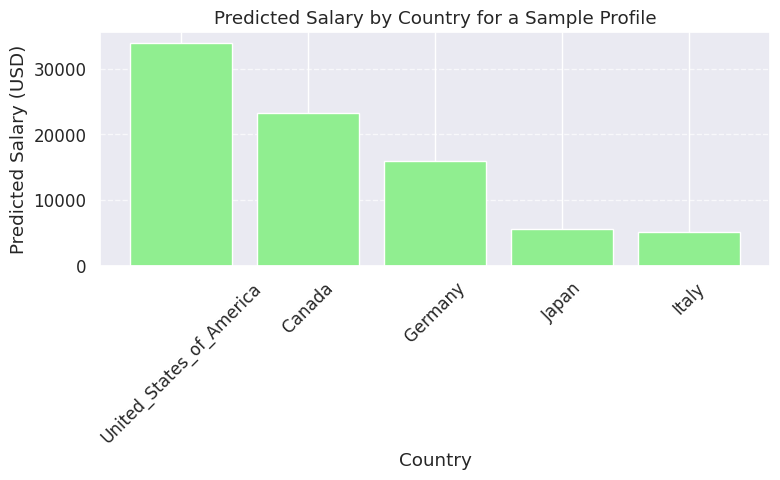

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Define countries and predicted salaries
# -------------------------------
countries = ["Germany", "Japan", "Canada", "United_States_of_America", "Italy"]
predicted_salaries = [15947, 5562, 23260, 33905, 5101]  # Predicted salaries from the model

# -------------------------------
# Create DataFrame to ensure correct mapping
# -------------------------------
country_salary_df = pd.DataFrame({
    "Country": countries,
    "PredictedSalary": predicted_salaries
})

# -------------------------------
# Sort by PredictedSalary for better visualization
# -------------------------------
country_salary_df = country_salary_df.sort_values(by="PredictedSalary", ascending=False)

# -------------------------------
# Plot: Predicted Salary by Country
# -------------------------------
plt.figure(figsize=(8,5))
plt.bar(country_salary_df["Country"], country_salary_df["PredictedSalary"], color='lightgreen')
plt.xlabel("Country")
plt.ylabel("Predicted Salary (USD)")
plt.title("Predicted Salary by Country for a Sample Profile")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Based on the LightGBM model predictions, the estimated annual salaries vary significantly depending on the country of residence:

- United States of America: $33,905

- Canada: $23,260

- Germany: $15,947

- Japan: $5,562

- Italy: $5,101

These results highlight the strong impact of geographic location on salary potential. Even with the same skills and experience, working in countries like the United States or Canada results in considerably higher predicted compensation compared to Japan or Italy.

For job seekers, this analysis suggests that:

Location matters: High-paying regions such as the U.S. or Canada may provide better opportunities for early-career developers.

Strategic relocation or remote work: Individuals may consider relocating or seeking remote positions in higher-paying countries to maximize earnings.

Skill utilization: While experience and skills are essential, the model shows that geographic factors can sometimes outweigh them in determining salary.

Overall, understanding the predicted salary differences by country can help job seekers make informed decisions about career planning, relocation, and job search strategy.

## Question 4: How does education level affect salary potential for job seekers?

Education level also plays a role, though smaller than experience and location.

- Master’s degrees or higher tend to contribute positively to predicted salaries according to the SHAP values.

- While not as impactful as experience or country, higher education can still enhance earning potential and career prospects.
This helps job seekers evaluate whether pursuing additional degrees or certifications is worthwhile.

SHAP values for education features:


,Feature,MeanAbsSHAP
208,EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...,3276.090361
207,EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng__...,2136.393972
211,EdLevel_Professional_degree__JD__MD__Ph_D__Ed_...,957.655709
213,EdLevel_Some_college_university_study_without_...,581.228681
212,EdLevel_Secondary_school__e_g__American_high_s...,220.187173
209,EdLevel_Other__please_specify__,56.129947
210,EdLevel_Primary_elementary_school,39.092665
214,EdLevel_Unknown,0.000000


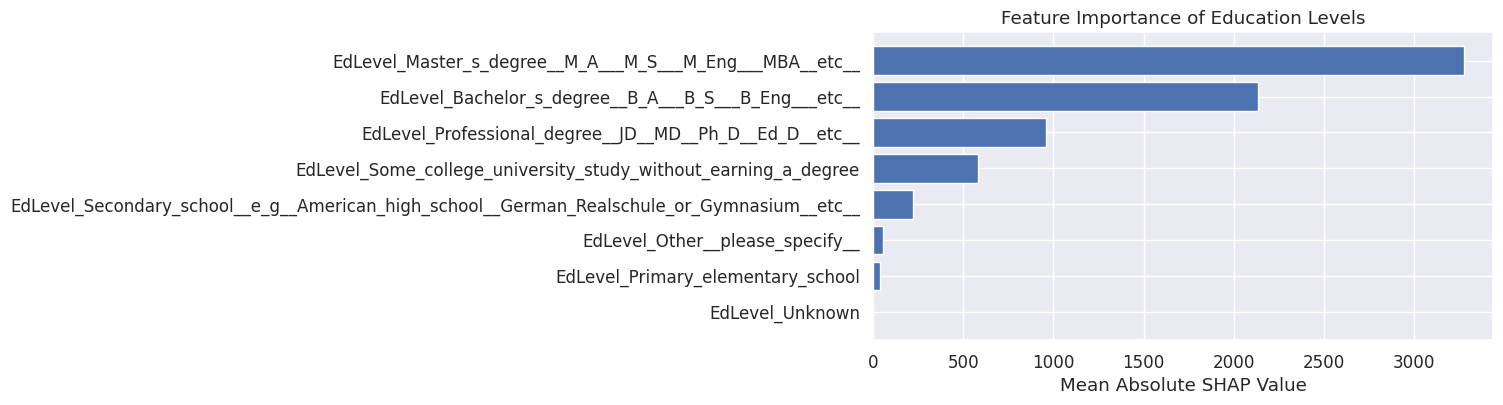

In [41]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Initialize SHAP explainer for LightGBM
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Create a DataFrame of mean absolute SHAP values
shap_df = pd.DataFrame({
    "Feature": X_test.columns,
    "MeanAbsSHAP": np.abs(shap_values).mean(axis=0)
})

# Filter for education-related features
edu_shap = shap_df[shap_df["Feature"].str.startswith("EdLevel_")]

# Sort by importance
edu_shap = edu_shap.sort_values(by="MeanAbsSHAP", ascending=False)

# Display the result
print("SHAP values for education features:")
display(edu_shap)

# Optional: plot a bar chart
plt.figure(figsize=(8,4))
plt.barh(edu_shap["Feature"], edu_shap["MeanAbsSHAP"])
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Feature Importance of Education Levels")
plt.gca().invert_yaxis()
plt.show()



## **Sample: Predicted Salary by Education Level**

In this analysis, we explore how salaries vary across different education levels when professional experience and coding experience are 1, 5, 10, and 15 years in the US. We assume weekly use of AI tools for all cases. Additionally, we compare scenarios for two programming languages, Python and Java, to examine how the combination of education, experience, and technical specialization influences predicted salary outcomes. This allows us to understand the relative impact of each factor on compensation over time.

### **Make a Function for Predicting Salary by Education Level**

In [96]:
def predict_salary_by_education(X_columns, base_features, skill="Python"):
    """
    Generate predicted salaries for all education levels using a trained model,
    with selectable programming language skill.

    This function creates input samples where each education level is activated
    one at a time while keeping other profile features fixed (work experience,
    country, AI usage, programming language, etc.). It is used to evaluate how
    education level alone affects salary predictions under a controlled profile.

    Parameters
    ----------
    X_columns : list
        The list of feature names used in training (X_train.columns).

    base_features : dict
        A dictionary specifying fixed feature values for the profile
        (e.g., work experience, country, AI usage, skills).

    skill : str
        Programming language skill to include in prediction. Options: "Python" or "JavaScript".
        Default is "Python".

    Returns
    -------
    pandas.DataFrame
        A table containing each education level and its predicted salary.
    """
    import pandas as pd

    # Extract all one-hot encoded education columns
    education_levels = [c for c in X_columns if c.startswith("EdLevel_")]

    rows = []

    for edu in education_levels:
        # Empty row with all zeros
        row = pd.Series(0, index=X_columns, dtype=float)

        # Apply fixed profile features
        for key, value in base_features.items():
            if key in row.index:
                row[key] = value

        # Set all education flags to 0
        for e in education_levels:
            row[e] = 0

        # Activate the current education level
        row[edu] = 1

        # Set the programming skill
        if skill in row.index:
            row[skill] = 1

        rows.append(row)

    # Create prediction dataframe
    pred_df = pd.DataFrame(rows)

    # Predict salaries
    salaries = lgb_model.predict(pred_df)

    # Return as readable table
    return pd.DataFrame({
        "Education": education_levels,
        "PredictedSalary": salaries
    })


**Salary Prediction in Python with 1, 5, 10, 15 years experience**

In [97]:
import pandas as pd

# --- Step 1: Define a function to predict multiple experience levels (Python skill) ---
def predict_salary_multiple_experience_python(X_columns, experience_years=[1,5,10,15]):
    """
    Predict salaries for all education levels across multiple experience years,
    assuming the developer has Python skill.

    Parameters
    ----------
    X_columns : list
        List of feature names used in training (X_train.columns).

    experience_years : list
        List of years of experience to predict (default [1, 5, 10, 15]).

    Returns
    -------
    pandas.DataFrame
        Table with Education levels as rows and experience years as columns.
    """
    salary_table = pd.DataFrame()  # Initialize empty DataFrame

    for exp in experience_years:
        # Base profile for current experience
        base_features = {
            "WorkExp": exp,
            "YearsCode": exp,
            "Country_United_States_of_America": 1,
            "AISelect_Yes__I_use_AI_tools_weekly": 1
        }

        # Predict salaries for all education levels
        df = predict_salary_by_education(
            X_columns=X_columns,
            base_features=base_features,
            skill="Python"  # Python skill
        )

        # Add predicted salaries as a new column
        salary_table[f"{exp} yrs"] = df['PredictedSalary']

    # Add Education levels as the first column
    salary_table.insert(0, "Education", df['Education'])
    return salary_table

# --- Step 2: Generate the table ---
salary_python_df = predict_salary_multiple_experience_python(X_train.columns)

# --- Step 3: Display the result as a table ---
display(salary_python_df)


,Education,1 yrs,5 yrs,10 yrs,15 yrs
0,EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng__...,71563.388811,99641.695665,154303.893644,171819.473162
1,EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...,41610.449076,93223.486999,150982.497499,166447.534530
2,EdLevel_Other__please_specify__,39051.606768,77516.461135,125202.681616,148405.043729
3,EdLevel_Primary_elementary_school,33142.493825,84947.681142,140483.711436,163474.988777
4,EdLevel_Professional_degree__JD__MD__Ph_D__Ed_...,60189.186823,114188.502321,154788.644269,158146.112915
5,EdLevel_Secondary_school__e_g__American_high_s...,14916.558117,65052.313860,118953.379329,157234.101762
6,EdLevel_Some_college_university_study_without_...,21590.924422,69771.427034,119952.883606,152119.409299
7,EdLevel_Unknown,33905.205670,85334.662829,141179.509748,164170.787089


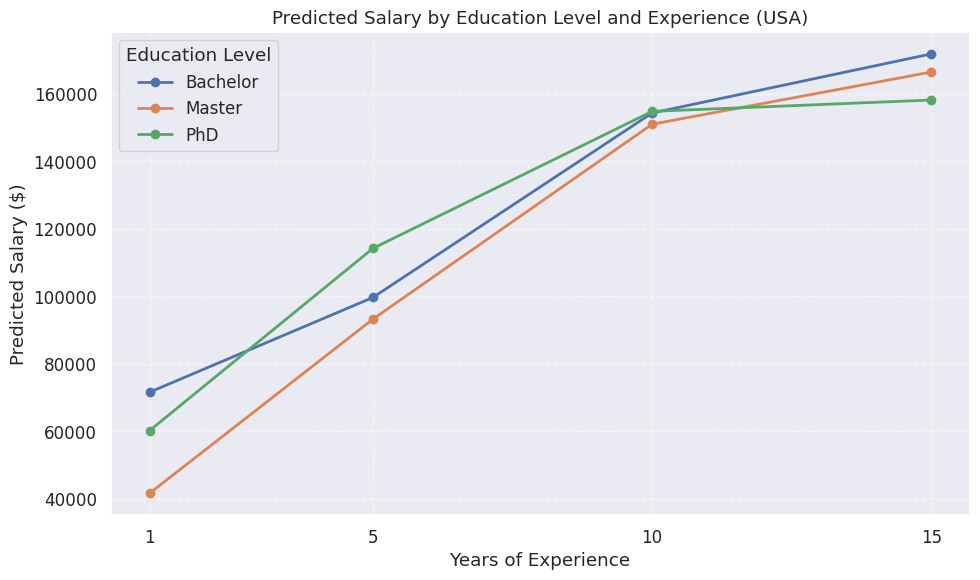

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare sample data ---
experience_years = [1, 5, 10, 15]

# Predicted salaries for Bachelor, Master, PhD
salaries = {
    "Bachelor": [71563, 99642, 154304, 171819],
    "Master":   [41610, 93223, 150982, 166448],
    "PhD":      [60189, 114188, 154789, 158146]
}

# Create a DataFrame for easier plotting
df = pd.DataFrame(salaries, index=experience_years)

# --- Plotting line chart ---
plt.figure(figsize=(10,6))

# Plot each education level as a line
for col in df.columns:
    plt.plot(df.index, df[col], marker='o', linewidth=2, label=col)

# Labels and title
plt.xticks(experience_years)
plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary ($)")
plt.title("Predicted Salary by Education Level and Experience (USA)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Education Level")
plt.tight_layout()

# Display the plot
plt.show()


**Salary Prediction in Python with 1, 5, 10, 15 years experience**

In [98]:
import pandas as pd

# --- Step 1: Define a function to predict multiple experience levels ---
def predict_salary_multiple_experience_js(X_columns, experience_years=[1,5,10,15]):
    """
    Predict salaries for all education levels across multiple experience years,
    assuming the developer has JavaScript skill.

    Parameters
    ----------
    X_columns : list
        List of feature names used in training (X_train.columns).

    experience_years : list
        List of years of experience to predict (default [1, 5, 10, 15]).

    Returns
    -------
    pandas.DataFrame
        Table with Education levels as rows and experience years as columns.
    """
    salary_table = pd.DataFrame()  # Initialize empty DataFrame

    for exp in experience_years:
        # Base profile for current experience
        base_features = {
            "WorkExp": exp,
            "YearsCode": exp,
            "Country_United_States_of_America": 1,
            "AISelect_Yes__I_use_AI_tools_weekly": 1
        }

        # Predict salaries for all education levels
        df = predict_salary_by_education(
            X_columns=X_columns,
            base_features=base_features,
            skill="JavaScript"
        )

        # Add predicted salaries as a new column
        salary_table[f"{exp} yrs"] = df['PredictedSalary']

    # Add Education levels as the first column
    salary_table.insert(0, "Education", df['Education'])
    return salary_table

# --- Step 2: Generate the table ---
salary_js_df = predict_salary_multiple_experience_js(X_train.columns)

# --- Step 3: Display the result as a table ---
display(salary_js_df)


,Education,1 yrs,5 yrs,10 yrs,15 yrs
0,EdLevel_Bachelor_s_degree__B_A___B_S___B_Eng__...,77887.639841,110318.156519,149641.631143,159320.997308
1,EdLevel_Master_s_degree__M_A___M_S___M_Eng___M...,50200.184947,106651.902404,147996.559470,164100.874339
2,EdLevel_Other__please_specify__,47054.398819,89596.781930,119876.166887,136991.369227
3,EdLevel_Primary_elementary_school,43031.014092,99674.880942,138796.557803,156594.464823
4,EdLevel_Professional_degree__JD__MD__Ph_D__Ed_...,69542.434623,129372.911745,156399.853740,158032.492252
5,EdLevel_Secondary_school__e_g__American_high_s...,22856.053732,77551.880015,114864.355304,147951.707415
6,EdLevel_Some_college_university_study_without_...,31658.488895,83346.493969,123380.472395,149564.946061
7,EdLevel_Unknown,43105.238817,100365.857600,138803.868995,156601.776014


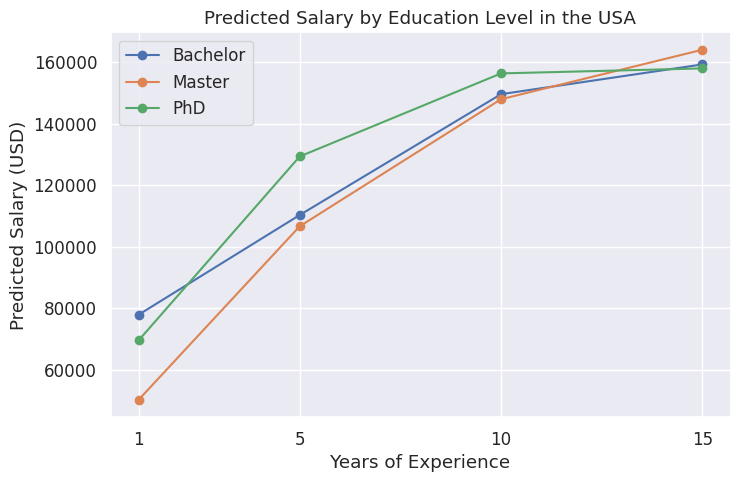

In [99]:
import matplotlib.pyplot as plt

# Experience in years
experience_years = [1, 5, 10, 15]

# Predicted salaries for selected education levels
salaries = {
    "Bachelor": [77887.64, 110318.16, 149641.63, 159320.99],
    "Master": [50200.18, 106651.90, 147996.56, 164100.87],
    "PhD": [69542.43, 129372.91, 156399.85, 158032.49]
}

# Plot the salaries
plt.figure(figsize=(8,5))
for edu, sal in salaries.items():
    plt.plot(experience_years, sal, marker='o', label=edu)

plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary (USD)")
plt.title("Predicted Salary by Education Level in the USA")
plt.xticks(experience_years)
plt.legend()
plt.grid(True)
plt.show()


In this model, although SHAP analysis indicated that a Master’s degree had a relatively strong contribution to predicted salary, actual calculations using concrete profiles with varying years of professional and coding experience suggest that education alone becomes less influential. As individuals accumulate more work and coding experience, the salary differences between education levels—Bachelor, Master, and PhD—tend to diminish, indicating that practical experience plays a stronger role than formal education in this scenario.